In [ ]:
#:
import babypandas as bpd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

# Lecture 14

## Models and Statistics

## Models

* A model is a set of assumptions about the data
* We want to assess the quality of models (are they right or wrong)?

## Models
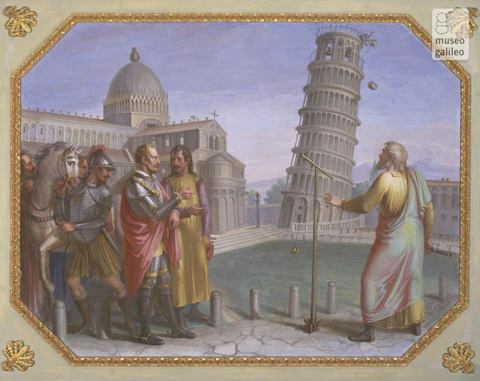

## Statistical Inference

* Making conclusions about models using data from random samples.

### Terminology

* **Parameter**: A number associated with the population
    - Example: the population mean.
* **Statistic**: A number calculated from the sample
    - Example: the sample mean.

A statistic can be used as an **estimate** of a parameter

### Estimating the number of enemy planes in WWII

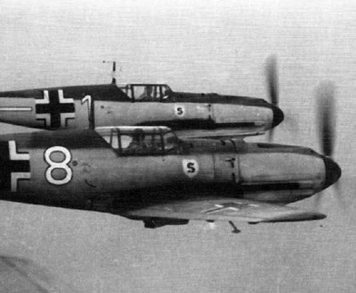

## Population and Sample

- Population: all enemy planes (unknown)
- Sample: the planes we've seen

### Setup

* Planes have serial numbers 1, 2, 3, …, N.
* We don’t know N.
* We would like to estimate N based on the serial numbers of the planes that we see.

### Discussion Question

If you saw these serial numbers, what would be your estimate (guess) of N?
```
170	 271	285	 290	 48
235	 24	 90 	 291 	19
```


- A) 291
- B) 350
- C) 470
- D) Different guess

### Approach #1: The largest number observed

* Is it likely to be close to the total number of planes, N?
    - How likely?
    - How close?

### Making some data

* We'll manufacture an unknown number of planes (between 200 and 400).
* We'll see a random sample of the planes (and their serial numbers).
* From the sample, we'll try to guess how many planes there are.

### The main assumption
The serial numbers of the planes that we see are a uniform random sample drawn with replacement from 1, 2, 3, …, N.

In [ ]:
#: manufacture
N = np.random.randint(200, 400)
serialnos = bpd.DataFrame().assign(SerialNumber=np.arange(1, N))

### Estimate: approach #1

- Our sample: 30 planes.
- Our statistic: the biggest serial number seen.
- Sample is random, so biggest seen is random.

In [ ]:
# the biggest serial number
serialnos.sample(30, replace=True).get('SerialNumber').max()

In [ ]:
# what was N?

In [ ]:
N

## Empirical Distribution of the Statistic

In [ ]:
#:
repetitions = 1000
sample_size = 30
maxes = np.array([])
for i in np.arange(repetitions):
    m = ...
    maxes = np.append(maxes, m)

In [ ]:
bpd.DataFrame().assign(maxes=maxes).plot(kind='hist', bins=np.arange(N-100, N+100, 5), density=True)
plt.axvline(N, color='C1')

### Verdict on the estimate

* The largest serial number observed is likely to be close to N.
* But it is also likely to underestimate N.

### Estimate: approach #2
* Average of the serial numbers observed  ~  N/2
* Try to estimate the number of planes using twice the average seen in the sample

In [ ]:
# the biggest serial number
serialnos.sample(30, replace=True).get('SerialNumber').mean() * 2

In [ ]:
# remember what the right answer was?
N

## Empirical Distribution of the Statistic

In [ ]:
#:
repetitions = 1000
sample_size = 30
twice_means = np.array([])
for i in np.arange(repetitions):
    m = serialnos.sample(sample_size, replace=True).get('SerialNumber').mean() * 2
    twice_means = np.append(twice_means, m)

In [ ]:
bpd.DataFrame().assign(twice_means=twice_means).plot(kind='hist', bins=np.arange(N-100, N+100, 5), density=True)
plt.axvline(N, color='C1')

## Probability Distribution of a Statistic

* Values of a statistic vary because random samples vary
* “Sampling distribution” or “probability distribution” of the statistic
    - All possible values of the statistic and all the corresponding probabilities.
* Can be hard to calculate: 
    - either have to do the math or have to generate all possible samples and calculate the statistic based on each sample


## Empirical Distribution of a Statistic
* Empirical distribution of the statistic
    - Based on simulated values of the statistic
    - Consists of all the observed values of the statistic,
    - and the proportion of times each value appeared

* Good approximation to the probability distribution of the statistic 
    - if the number of repetitions in the simulation is large



## Estimating the Number of Planes
* Statistic: `max`, `2 * mean`
* Probability distribution: 
    - e.g. likelihood `max` of a sample of 30 out of 300 is equal to N
* Empirical distribution: histograms from our simulations

## Bias and Variance
* Which statistic was a better estimate?

## Bias
* Biased estimate: On average across all possible samples, the estimate is either too high or too low.
* Bias creates a systematic error in one direction.
* Good estimates typically have low bias.

## Variability

* The degree to which the value of an estimate varies from one sample to another.
* High variability makes it hard to estimate accurately.
* Good estimates typically have low variability.

## Bias-variance trade-off
* The max has low variability, but it is biased.
* 2 * average has little bias, but it is highly variable.
* Life is tough.

# Example: Jury Selection

### Swain vs. Alabama, 1965
* Talladega County, Alabama
* Robert Swain, black man convicted of crime
* Appeal: one factor was all-white jury
* Only men 21 years or older were allowed to serve
* 26% of this population were black
* Swain’s jury panel consisted of 100 men
* 8 men on the panel were black


### Supreme Court Ruling

* About disparities between the percentages in the eligible population and the jury panel, the Supreme Court wrote:

> "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes”

* The Supreme Court denied Robert Swain’s appeal
* Is this conclusion reasonable? Let's check.


### Our model for simulating Swain's jury panel

* *Assume* jury panel is 100 *randomly* chosen eligible prospective jurors
* 26% of population is black
* Our question: is this model (i.e., assumption) right or wrong?

## Our approach: simulation

- We will assume that this model is true.
- We'll generate a bunch of jury panels using the assumption.
- We'll see how likely it is for a random panel to contain $\leq$ 8 black men.

## Recall: simulation

1. Figure out how to run the experiment once
2. Run the experiment a bunch of times, store results in array with `np.append`.
3. Analyze the results.

## Simulation for Statistics

1. Figure out the code to generate one value of the statistic
2. Run the experiment a bunch of times, generating many values of statistic, store in an array.
3. Visualize distribution

## 1. Running the experiment once

- How do we randomly sample a jury panel?
* Sample at random from a categorical distribution

```
np.random.multinomial(
    sample_size, pop_distribution
)
```

* Samples at random from the population
    - Returns an random array containing the number samples in each category


## Example

- In 2008, M&Ms were produced with the following probabilities:

> 24% blue, 20% orange, 16% green, 14% yellow, 13% red, and 13% brown

In [ ]:
# sample a bag of 100 M&Ms
np.random.multinomial(100, [.24, .2, .16, .14, .13, .13])

In [ ]:
demographics = [0.26, 0.74]

In [ ]:
np.random.multinomial(100, demographics)

## 1. Running the experiment once
- Calculate the statistic: number of black men among random sample of 100 men from eligible population

In [ ]:
np.random.multinomial(100, demographics)[0]

## 2. Run the experiment a bunch

* run 10k simulations.
* keep number of black men in each panel in array `counts`

In [ ]:
counts = np.array([])

for i in np.arange(10000):
    new_count = np.random.multinomial(100, demographics)[0]
    counts = np.append(counts, new_count)

### 3. Visualize the distribution
* Was a jury panel with 8 black men suspiciously unusual?

In [ ]:
# in 10000 random experiments, the panel with the fewest black men had:
counts.min()

In [ ]:
#:
bpd.DataFrame().assign(count=counts).plot(kind='hist', bins = np.arange(9.5, 45, 1), density=True)
observed_count = 8
plt.axvline(observed_count, color='red')

# Example: the Genetics of Peas

## Gregor Mendel, 1822-1884
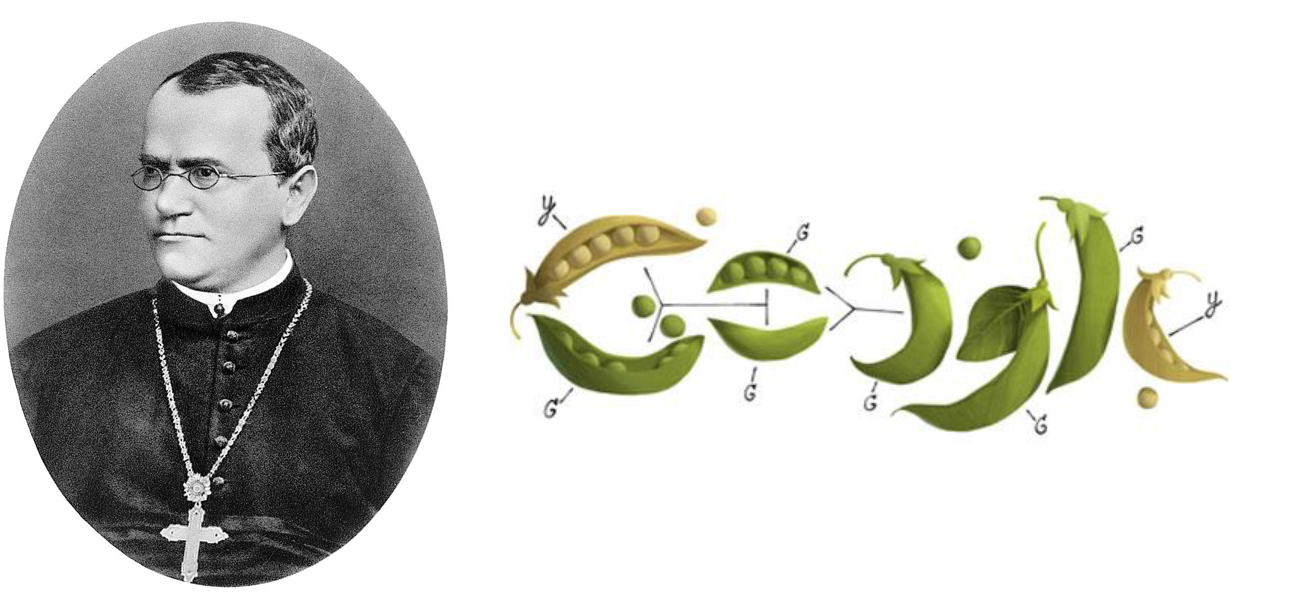

## Mendel's model

* Pea plants of a particular kind
* Each one has either purple flowers or white flowers

* Mendel’s model:
    - Each plant is purple-flowering with chance 75%,
    - independent of the colors of the other plants

### Question
* Is the model good, or not?

### Choosing a Statistic
* Start with percent of purple-flowering plants in sample
* If that percent is much larger or much smaller than 75, that is evidence against the model
* Statistic:
```| 'sample percent of purple-flowering plants' - 0.75 |```

In [ ]:
#:
model = [0.75, 0.25]

In [ ]:
# draw 929 plants
np.random.multinomial(929,  model)

### The statistic
* distance between sample percent (of purple plants) and 75
* If the statistic is large, that is evidence against the model

### Simulate Mendel's experiment
* Mendel observed results of growing 929 pea plants

In [ ]:
#:
distances = np.array([])

for i in np.arange(10000):
    new_distance = abs(np.random.multinomial(929,  model)[0]/929 - .75)
    distances = np.append(distances, new_distance)

In [ ]:
#:
bpd.DataFrame().assign(distance=distances).plot(kind='hist', density=True, bins=20)

### Mendel's experiment
* Of the 929 pea plants, Medel observed 705 of these had purple flowers.
* Was his model a good model?

In [ ]:
#:
observed_distance =  abs((705/929) - .75)
observed_distance

In [ ]:
bpd.DataFrame().assign(distance=distances).plot(kind='hist', density=True, bins=20)

In [ ]:
bpd.DataFrame().assign(distance=distances).plot(kind='hist', density=True, bins=20)
plt.axvline(observed_distance, color='red');